### 1. Load packages
Let's load the required packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Importing the data

In [2]:
data = pd.read_csv('dataset/Monthly_data_cmo.csv')

In [3]:
data.head(10)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
5,Ahmednagar,Sorgum(Jawar),2016,April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra
6,Ahmednagar,Maize,2015,April,75,1345,1401,1373,2015-04,Ahmadnagar,Maharashtra
7,Ahmednagar,Maize,2016,April,155,1367,1392,1375,2016-04,Ahmadnagar,Maharashtra
8,Ahmednagar,Gram,2015,April,1794,3533,3762,3647,2015-04,Ahmadnagar,Maharashtra
9,Ahmednagar,Gram,2016,April,630,4790,5553,5216,2016-04,Ahmadnagar,Maharashtra


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [5]:
data['Commodity'] = data['Commodity'].str.title()
commodities = data['Commodity'].unique()
apmcs = data['APMC'].unique()
print(f"Total unique commodities: {len(commodities)}")
print(f"Total unique APMCs: {len(apmcs)}")

Total unique commodities: 204
Total unique APMCs: 349


In [6]:
top_apmcs = data['APMC'].value_counts().sort_values(ascending=False)[:10]
print("Top APMCs:\n", top_apmcs)
top_commodities = pd.DataFrame(data['Commodity'].value_counts().sort_values(ascending=False))[:7]
print("\nTop Commodities: \n", top_commodities)

Top APMCs:
 Mumbai         1538
Pune           1513
Nagpur         1340
Barshi         1076
Jalgaon        1055
Solapur         984
Kamthi          967
Shrirampur      947
Kalyan          932
Pune-Manjri     930
Name: APMC, dtype: int64

Top Commodities: 
                   Commodity
Gram                   4115
Wheat(Husked)          4097
Soybean                3727
Sorgum(Jawar)          3716
Pigeon Pea (Tur)       3477
Maize                  2546
Green Gram             2425


### 3. Plotting `modal_price` vs `date`

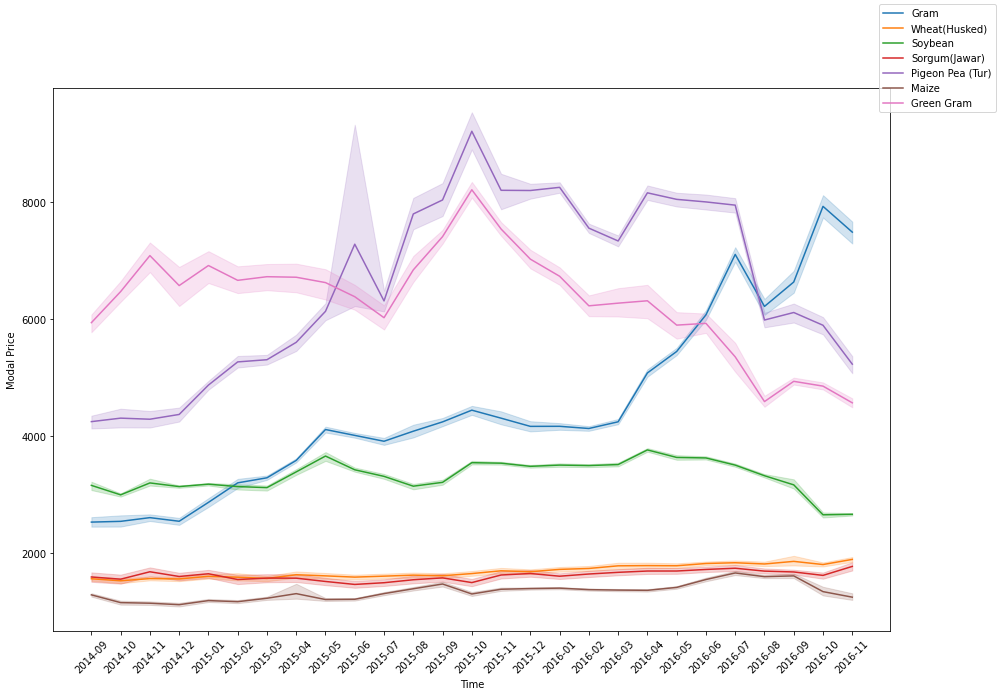

In [7]:
fig = plt.figure(figsize=(15,10))
for commodity in top_commodities.index:
    commodity_monthly = data.loc[(data['Commodity'] == str(commodity))]
    sns.lineplot(x=commodity_monthly['date'], y=commodity_monthly['modal_price'], legend='full')
fig.legend(top_commodities.index)
plt.xlabel('Time')
plt.ylabel('Modal Price')
plt.xticks(rotation='45')
fig.patch.set_facecolor('white')
plt.show()

### 4. Removing outliers using IQR

This function `IQR()` takes as input a dataframe and returns the a boolean list of indices that are to be removed.

In [8]:
def IQR(df):
    Q1 = df["modal_price"].quantile(0.25)
    Q3 = df["modal_price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    to_delete = ( (df["modal_price"] < lower_limit) | (df["modal_price"] > upper_limit) )
    return to_delete

In [9]:
outlier_indices = []
for commodity in commodities:
    comm = data[data['Commodity'] == commodity]
    comm_dates = comm['date'].unique()
    for date in comm_dates:
        df = comm.loc[comm['date'] == date]
        bool_list = IQR(df)
        to_delete = bool_list.loc[bool_list == True].index.to_list()
        outlier_indices.extend(to_delete)

In [10]:
clean_data = data.drop(outlier_indices) # Removing outliers

In [11]:
print(clean_data.shape[0])
print(data.shape[0])
print(f'Total outliers removed: {data.shape[0] - clean_data.shape[0]}')

59144
62429
Total outliers removed: 3285


In [12]:
clean_data.to_csv('dataset/clean_data.csv') # Storing the cleaned data as .csv file.

### 5. Plotting `modal_price` vs `date` after cleaning data

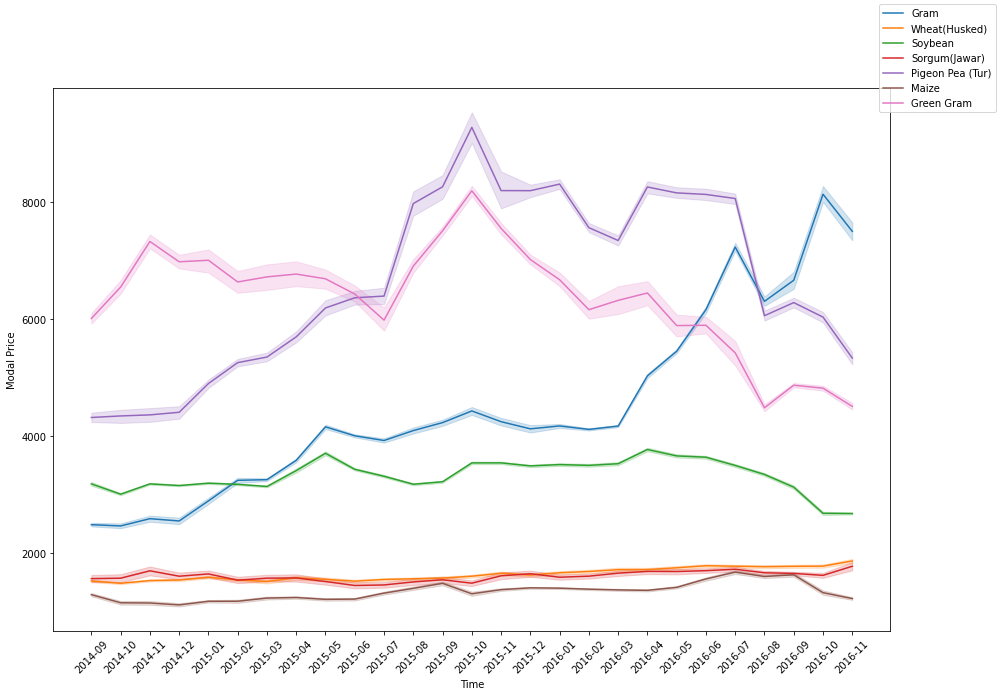

In [13]:
fig = plt.figure(figsize=(15,10))
for commodity in top_commodities.index:
    commodity_monthly = clean_data.loc[(clean_data['Commodity'] == str(commodity))]
    sns.lineplot(x=commodity_monthly['date'], y=commodity_monthly['modal_price'], legend='full')
fig.legend(top_commodities.index)
plt.xlabel('Time')
plt.ylabel('Modal Price')
plt.xticks(rotation='45')
fig.patch.set_facecolor('white')
plt.show()

### 6. Top 50 clusters visualized

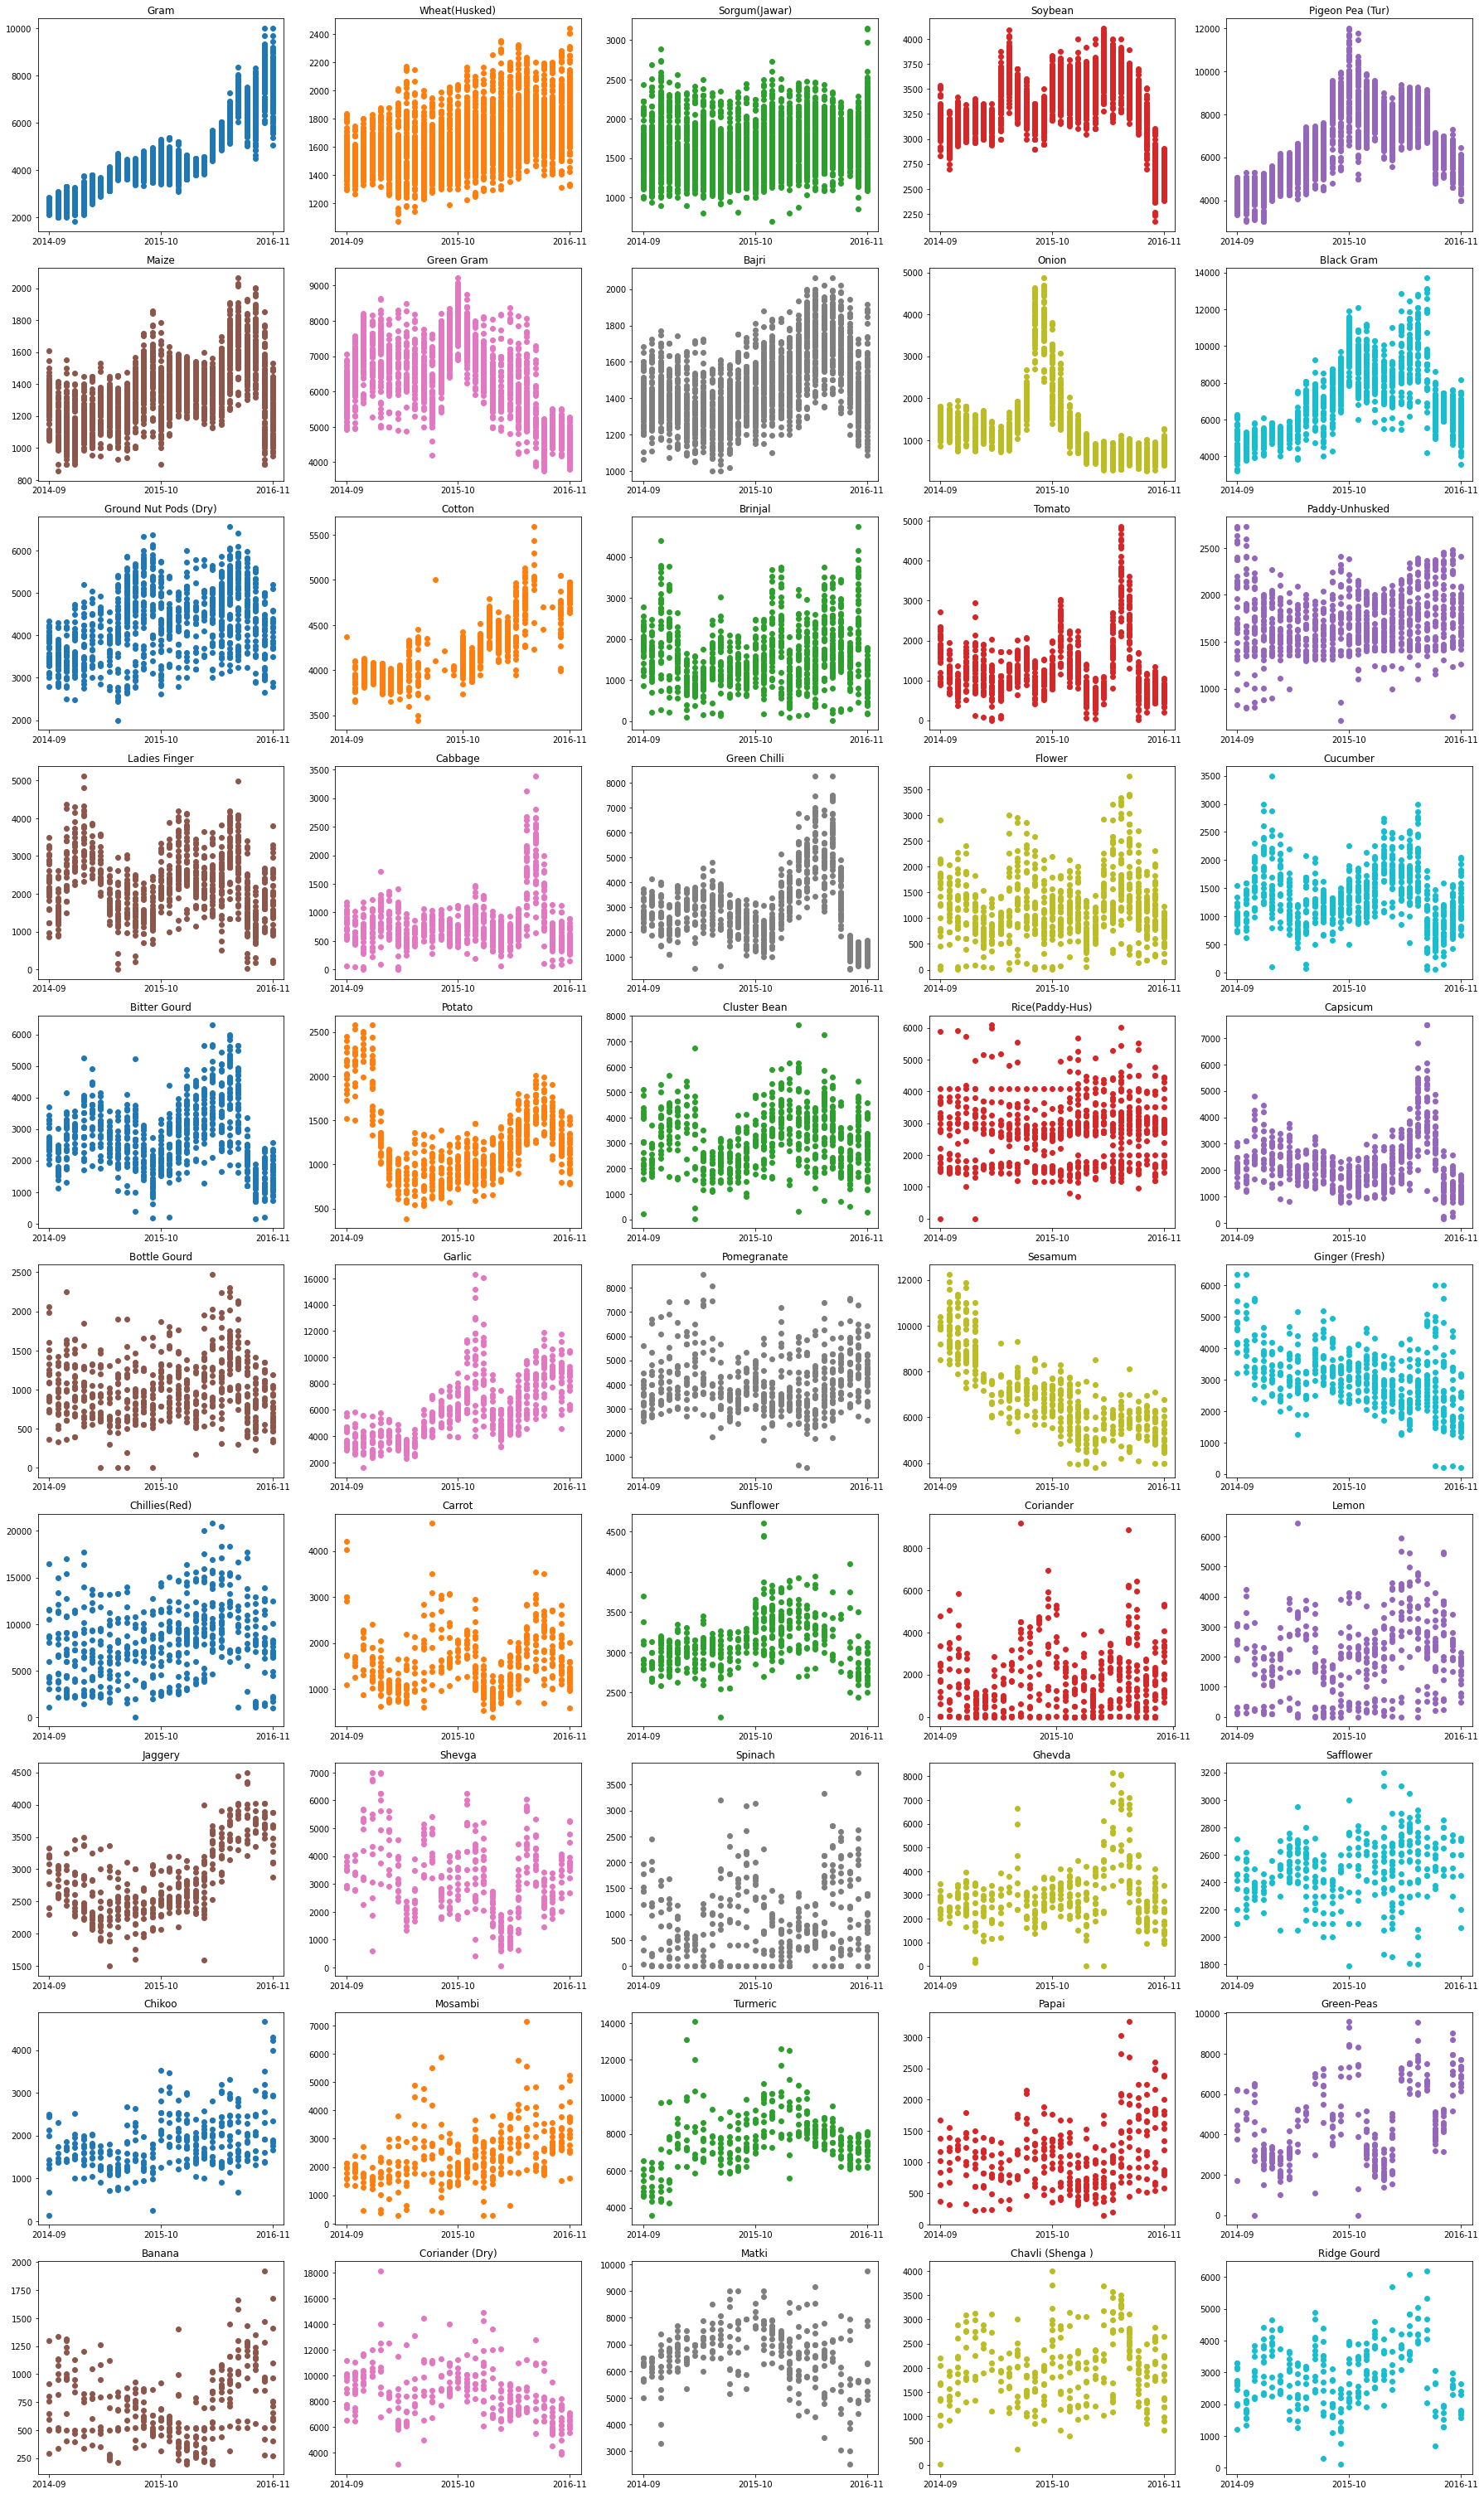

In [14]:
top_commodities = pd.DataFrame(clean_data['Commodity'].value_counts().sort_values(ascending=False))[:50]
fig = plt.figure(figsize=(25,50))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
for idx, commodity in enumerate(top_commodities.index):
    comm = clean_data[clean_data['Commodity'] == commodity].sort_values('date')
    ax = fig.add_subplot((len(top_commodities.index)/4),5,idx+1)
    ax.scatter(comm['date'], comm['modal_price'], color=colors[idx%10])
    ax.set_title(commodity)
    ax.get_xaxis().set_ticks(['2014-09', '2015-10', '2016-11'])
plt.tight_layout()    
fig.patch.set_facecolor('white')